In [1]:
# https://github.com/GabrielGalucio/Trilha-Python-IA/blob/master/Aula_de_Data_Visualization.ipynb
import pandas as pd

uri = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula4.1/movies.csv'
filmes = pd.read_csv(uri) # data frame
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes = filmes.set_index('filmeId')
filmes = filmes.join(filmes['generos'].str.get_dummies()).drop('generos', axis=1)
filmes['ano'] = filmes['titulo'].str.extract(r'.*\((\d+)\)')
filmes = filmes.dropna()
filmes.head()

,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ano
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1995
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995


In [2]:
uri = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula4.1/ratings.csv'
notas = pd.read_csv(uri)
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
arredondadas = notas['nota'].round(1)
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
medias = notas.groupby('filmeId')['nota'].mean()
filmes = filmes.join(medias).dropna().sort_values('nota', ascending=False).rename(columns={'nota' : 'media'})

total = notas.groupby('filmeId')['momento'].count()
filmes = filmes.join(total)
filmes = filmes.rename(columns={'momento' : 'total'})
filmes = filmes.query('total > 50')
filmes['media_categoria'] = (filmes['media']).round(1).values

random_filmes = filmes.sample(10)

In [4]:
random_filmes

,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,ano,media,total,media_categoria
filmeId,,,,,,,,,,,,,,,,,,,,,
59315,Iron Man (2008),0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,2008,3.824468,94,3.8
59784,Kung Fu Panda (2008),0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,2008,3.444444,54,3.4
63082,Slumdog Millionaire (2008),0,0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,2008,3.809859,71,3.8
163,Desperado (1995),0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1995,3.560606,66,3.6
72998,Avatar (2009),0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,2009,3.603093,97,3.6
48,Pocahontas (1995),0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,0,1995,3.147059,68,3.1
62,Mr. Holland's Opus (1995),0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1995,3.706250,80,3.7
5618,Spirited Away (Sen to Chihiro no kamikakushi) ...,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,2001,4.155172,87,4.2
2081,"Little Mermaid, The (1989)",0,0,0,1,1,1,0,0,0,...,0,1,0,0,0,0,1989,3.425373,67,3.4


In [5]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


array([[<AxesSubplot:title={'center':'usuarioId'}>,
        <AxesSubplot:title={'center':'filmeId'}>],
       [<AxesSubplot:title={'center':'nota'}>,
        <AxesSubplot:title={'center':'momento'}>]], dtype=object)

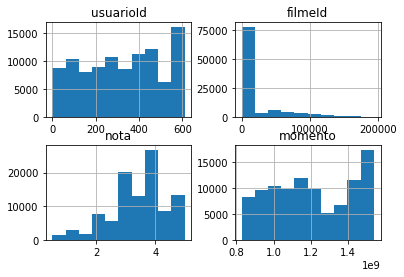

In [6]:
notas.hist()

<AxesSubplot:>

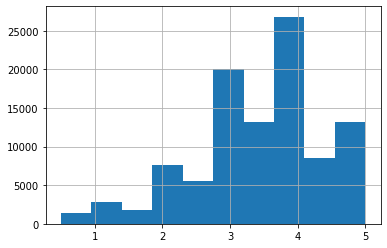

In [7]:
notas['nota'].hist()

<AxesSubplot:ylabel='nota'>

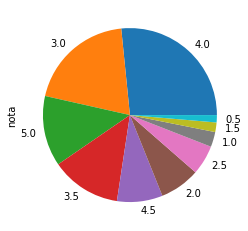

In [8]:
arredondadas.value_counts().plot.pie() # value_counts conta quantas notas de um tipo tem (ex.: quantas notas 4 temos)

<AxesSubplot:ylabel='nota'>

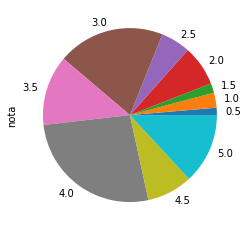

In [9]:
arredondadas.value_counts().to_frame().reset_index().sort_values("index").set_index("index")["nota"].plot.pie()

/home/daniellucas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


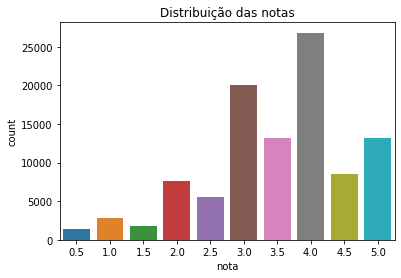

In [13]:
import seaborn as sns # lib para melhor data visualization
import matplotlib.pyplot as plt

sns.countplot(arredondadas)
plt.title("Distribuição das notas");

/home/daniellucas/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota', ylabel='count'>

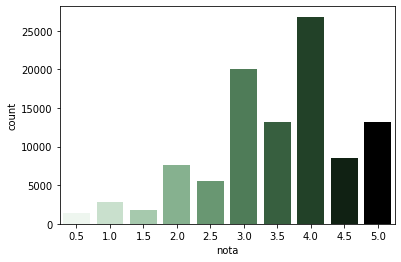

In [17]:
palette = sns.color_palette("Blues", 10)
palette = sns.cubehelix_palette(10, start=2, rot=0, dark=0, light=.95)
sns.countplot(arredondadas, palette=palette)

/home/daniellucas/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='media', ylabel='Density'>

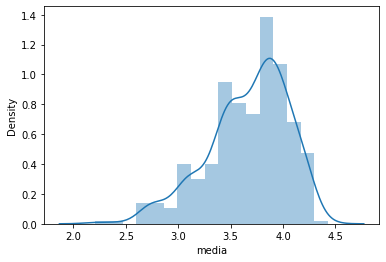

In [18]:
sns.distplot(filmes['media'])

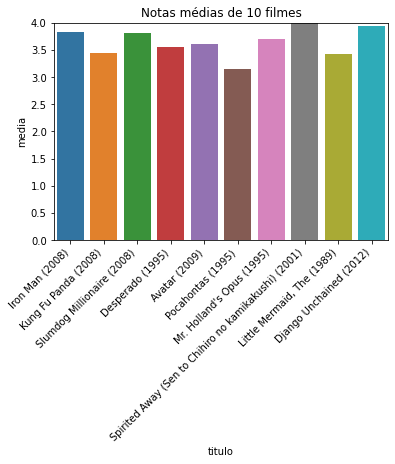

In [27]:
p = sns.barplot(data=random_filmes, x = "titulo", y= "media")
p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment = "right")
plt.title("Notas médias de 10 filmes")
plt.ylim(0, 4) # valores limites do eixo y -> começa do 0 ao 4
plt.show()

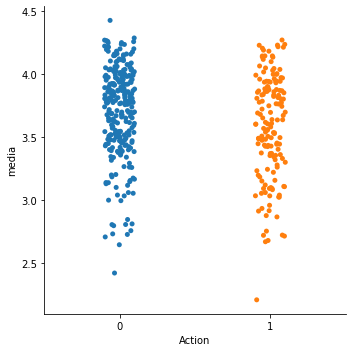

In [28]:
sns.catplot(data=filmes, x="Action", y="media")

/home/daniellucas/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/daniellucas/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='media', ylabel='Density'>

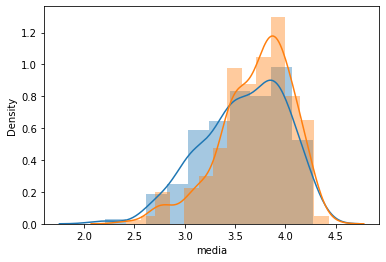

In [30]:
sns.distplot(filmes.query("Action == 1")["media"])
sns.distplot(filmes.query("Action == 0")["media"])

<AxesSubplot:xlabel='filmeId', ylabel='nota'>

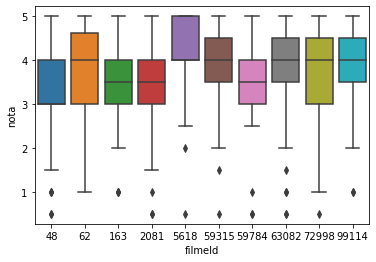

In [34]:
ids_aleatorios = ",".join(random_filmes.index.values.astype(str))
query = f"filmeId in ({ids_aleatorios})"
sns.boxplot(data = notas.query(query), x= "filmeId", y = "nota")

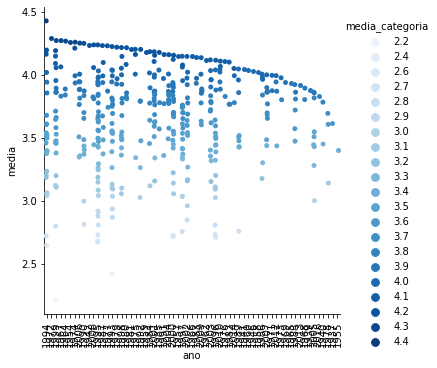

In [56]:
total_de_categorias = len(filmes['media_categoria'].unique())
p = sns.catplot(x="ano", y="media", hue = "media_categoria", palette = sns.color_palette("Blues", total_de_categorias), data=filmes) 
p.set_xticklabels(rotation=90)